In [426]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from skimage import io

# Task 1

## PCA

In [427]:
df = pd.read_csv('drug200.csv')

In [428]:
# Используется для преобразования категориальных или
# текстовых данных в числа, которые наши предсказательные
# модели понимают лучше.
from sklearn.preprocessing import LabelEncoder


#function to label
def label_encoder(x):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])


#create a list of data needed to be labeled
categories = ['Sex', 'BP', 'Cholesterol', 'Drug']

for label in categories:
    label_encoder(label)

In [429]:
X = df.drop('Drug', axis=1)
Y = df['Drug']

t = StandardScaler()
X_t = t.fit_transform(X)


In [430]:
pca = PCA(n_components=2, svd_solver='full')
x_pca = pca.fit_transform(X_t, )

c:\users\nikit\pycharmprojects\labs_ad\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

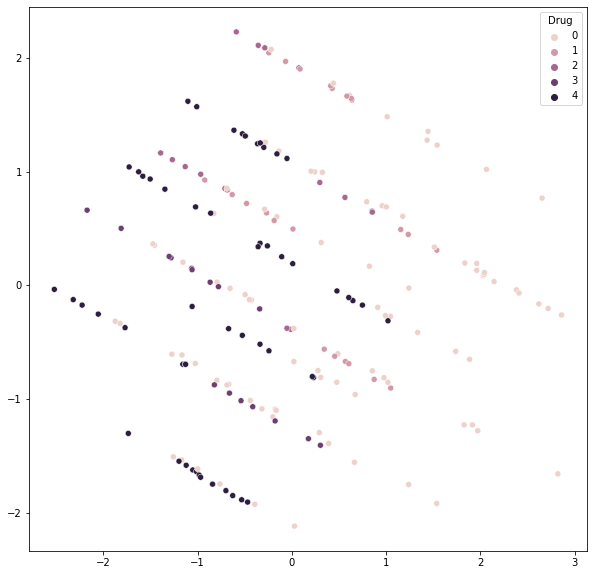

In [431]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x_pca[:, 0], x_pca[:, 1], hue=Y)

In [432]:
pca.explained_variance_

array([1.29836642, 1.0817823 ])

In [433]:
pca.explained_variance_ratio_


array([0.25837492, 0.21527468])

## TSNE

In [434]:
ts = TSNE(n_components=2, init="pca", learning_rate='auto')
x_tsne = ts.fit_transform(X)

c:\users\nikit\pycharmprojects\labs_ad\venv\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


c:\users\nikit\pycharmprojects\labs_ad\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

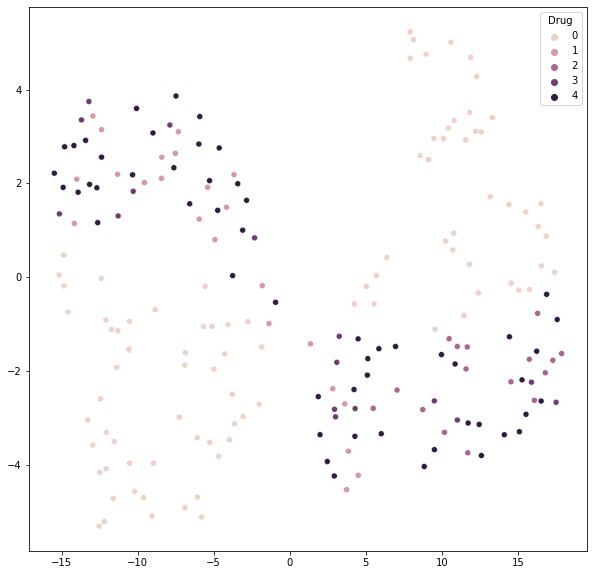

In [435]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x_tsne[:, 0], x_tsne[:, 1], hue=Y)

In [436]:
x_tsne.shape

(200, 2)

# Task 2

In [437]:
n_colors = 64

img = io.imread("image.jpg")
print(img.shape)

(518, 960, 3)


In [438]:
# Преобразование в числа с плавающей запятой вместо 8-битного целочисленного
# кодирования по умолчанию. Деление на 55 важно для того, чтобы plt.imshow хорошо
# работал с данными с плавающей запятой (должно быть в диапазоне [0-1]).
#img = np.array(img, dtype=np.float64) / 255


In [439]:
# Загрузите изображение и преобразуйте его в массив 2D numpy.
w, h, d = original_shape = tuple(img.shape)

In [440]:
assert d == 3
image_array = np.reshape(img, (w * h, d))

In [441]:
from sklearn.utils import shuffle
print("Fitting model on a small sub-sample of the data")
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

Fitting model on a small sub-sample of the data
done in 0.062s.


In [443]:
from sklearn.metrics import pairwise_distances_argmin
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)

Predicting color indices on the full image (random)
done in 0.181s.


In [444]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

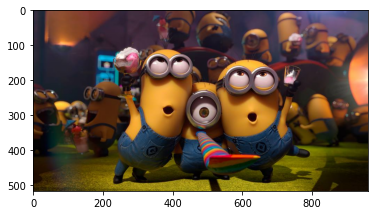

In [445]:
plt.imshow(img)

## 64

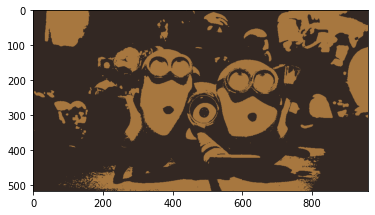

In [447]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

## 32

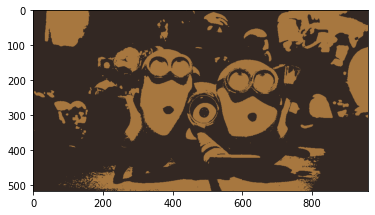

In [448]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

## 16

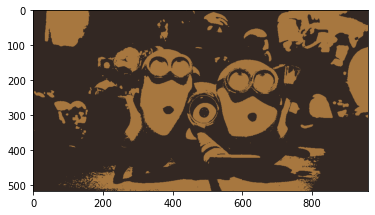

In [450]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

## 8

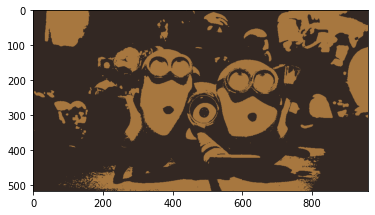

In [451]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

## 2

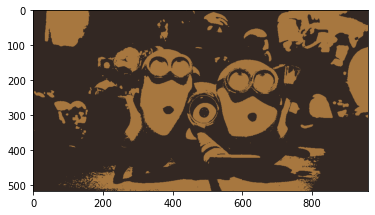

In [452]:
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h).astype(int))

# Task 3
